In [1]:
from tensorflow.keras.applications import ResNet50

# Create an instance of the ResNet50 model
model = ResNet50(weights='imagenet')

# Optional: Print a summary of the model architecture
model.summary()

2023-05-27 13:53:10.989556: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 13:53:11.034585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 13:53:11.035742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 13:53:12.111961: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt


images=tf.data.Dataset.list_files('/mnt/e/Lewagon_Project/mouse_cleaned/resized_png/mouse/*')
for image in images.take(3):
    print(image)
    
image_count=len(images)
print(image_count)

tf.Tensor(b'/mnt/e/Lewagon_Project/mouse_cleaned/resized_png/mouse/4P9LIYSZ5ZTD.png', shape=(), dtype=string)
tf.Tensor(b'/mnt/e/Lewagon_Project/mouse_cleaned/resized_png/mouse/NE0KJVYDO2AC.png', shape=(), dtype=string)
tf.Tensor(b'/mnt/e/Lewagon_Project/mouse_cleaned/resized_png/mouse/H562RSAA39M0.png', shape=(), dtype=string)
830


2023-05-27 13:53:15.927414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [830]
	 [[{{node Placeholder/_0}}]]
2023-05-27 13:53:15.927620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [830]
	 [[{{node Placeholder/_0}}]]


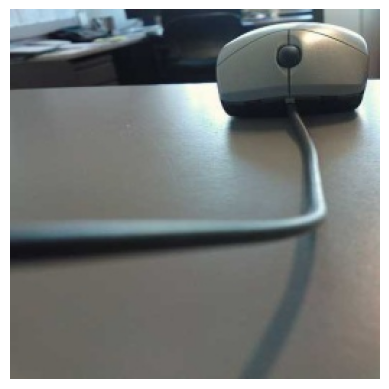

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image file
image = mpimg.imread("/mnt/e/Lewagon_Project/mouse_cleaned/resized_png/mouse/08WBAV853XST.png")

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
from PIL import Image
import numpy as np
import os

folder_path = "/mnt/e/Lewagon_Project/dummy"  # Replace with the path to your folder

# Get a list of all PNG files in the folder
png_files = [file for file in os.listdir(folder_path) if file.endswith(".png")]

# Iterate over each PNG file
for file_name in png_files:
    # Open the image file
    file_path = os.path.join(folder_path, file_name)
    image = Image.open(file_path)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Process the image array as needed
    # ...

    # Print the shape and data type of the array
    print("Array shape:", image_array.shape)
    print("Array data type:", image_array.dtype)
    print(image_array)

In [5]:
train_size=int(image_count*0.8)

train_ds=images.take(train_size)
test_ds=images.skip(train_size)
def get_label(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]
# print(get_label(s))
#CODE ENDS

#extract the images
def process_image(file_path):
    labels=get_label(file_path)
    img=tf.io.read_file(file_path)
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[128,128])
    return labels, img


#ALL LABELS and images
for img,label in train_ds.map(process_image).take(4):
    print(img)
    print(label)
    


tf.Tensor(b'mouse', shape=(), dtype=string)
tf.Tensor(
[[[ 94.   104.   113.   255.  ]
  [100.25 110.25 119.25 255.  ]
  [105.75 115.75 124.75 255.  ]
  ...
  [ 55.75  54.75  50.75 255.  ]
  [ 58.25  57.25  53.25 255.  ]
  [ 60.75  59.75  55.75 255.  ]]

 [[ 88.25  98.25 107.25 255.  ]
  [ 96.75 106.75 115.75 255.  ]
  [107.25 117.25 126.25 255.  ]
  ...
  [ 55.5   54.5   50.5  255.  ]
  [ 58.    57.    53.   255.  ]
  [ 59.5   58.5   54.5  255.  ]]

 [[ 85.    95.   104.   255.  ]
  [ 96.25 106.25 115.25 255.  ]
  [106.75 116.75 125.75 255.  ]
  ...
  [ 55.5   54.5   50.5  255.  ]
  [ 58.25  57.25  53.25 255.  ]
  [ 58.25  57.25  53.25 255.  ]]

 ...

 [[214.25 218.25 221.25 255.  ]
  [209.25 213.25 216.25 255.  ]
  [213.25 217.25 220.25 255.  ]
  ...
  [146.5  128.5  104.5  255.  ]
  [148.   130.   106.   255.  ]
  [145.75 127.75 103.75 255.  ]]

 [[212.   216.   219.   255.  ]
  [210.25 214.25 217.25 255.  ]
  [212.25 216.25 219.25 255.  ]
  ...
  [148.   130.   106.   255.  ]
  [14

2023-05-27 13:53:16.281643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [830]
	 [[{{node Placeholder/_0}}]]
2023-05-27 13:53:16.281879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [830]
	 [[{{node Placeholder/_0}}]]


In [6]:
import tensorflow as tf


# Specify the directory containing the images
data_dir = "/mnt/e/Lewagon_Project/dummy"

# Create a TensorFlow dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    seed=42,
    subset="training"
)



Found 2328 files belonging to 4 classes.
Using 1863 files for training.


In [7]:
# Iterate over the dataset
for images, labels in dataset:
    # Perform operations on the batch of images and labels
    print(images)
    print(labels)
    print('----------------')

2023-05-27 13:53:19.206563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1863]
	 [[{{node Placeholder/_4}}]]
2023-05-27 13:53:19.206886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1863]
	 [[{{node Placeholder/_4}}]]


tf.Tensor(
[[[[ 79.2398      58.520405    53.65816   ]
   [ 49.464283    31.591831    27.836731  ]
   [ 17.928572     6.0714283    3.5204082 ]
   ...
   [  2.           2.           2.        ]
   [  2.8418438    2.8418438    2.8418438 ]
   [  3.9336896    3.9336896    3.9336896 ]]

  [[ 70.87755     52.224487    48.68367   ]
   [ 27.5153      11.352037     8.622446  ]
   [ 14.65306      3.4387755    1.8673468 ]
   ...
   [  2.           2.           2.        ]
   [  3.5714417    3.5714417    3.5714417 ]
   [  4.           4.           4.        ]]

  [[ 38.244896    21.97959     20.42857   ]
   [ 12.918367     1.1377556    0.4285717 ]
   [ 12.040815     4.           1.8979592 ]
   ...
   [  2.           2.           2.        ]
   [  3.290827     3.290827     3.290827  ]
   [  3.9744961    3.9744961    3.9744961 ]]

  ...

  [[148.57144     92.57144     43.52042   ]
   [147.35205     91.42858     41.20922   ]
   [145.92859     90.51532     37.500042  ]
   ...
   [ 92.48467     49.770

In [16]:
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Map labels to one-hot encoded format
num_classes = 4 # Number of classes in ImageNet
dataset = dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics = 'accuracy')

# Train the model

# Evaluate the model
results = model.evaluate(dataset)

print("Evaluation results:")
for metric_name, result in zip(model.metrics_names, results):
    print(f"{metric_name}: {result}")

TypeError: in user code:

    File "/tmp/ipykernel_5251/2955168583.py", line 5, in None  *
        lambda x, y: (x, tf.one_hot(y, num_classes))

    TypeError: Value passed to parameter 'indices' has DataType float32 not in list of allowed values: uint8, int8, int32, int64
